## Support Vector Machines

In [6]:
import numpy as np
import pandas as  pd
from scipy import stats 
import seaborn  as sns;sns.set()
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets.samples_generator  import make_blobs


In [8]:
X,Y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)

In [9]:
X

array([[ 1.41281595,  1.5303347 ],
       [ 1.81336135,  1.6311307 ],
       [ 1.43289271,  4.37679234],
       [ 1.87271752,  4.18069237],
       [ 2.09517785,  1.0791468 ],
       [ 2.73890793,  0.15676817],
       [ 3.18515794,  0.08900822],
       [ 2.06156753,  1.96918596],
       [ 2.03835818,  1.15466278],
       [-0.04749204,  5.47425256],
       [ 1.71444449,  5.02521524],
       [ 0.22459286,  4.77028154],
       [ 1.06923853,  4.53068484],
       [ 1.53278923,  0.55035386],
       [ 1.4949318 ,  3.85848832],
       [ 1.1641107 ,  3.79132988],
       [ 0.74387399,  4.12240568],
       [ 2.29667251,  0.48677761],
       [ 0.44359863,  3.11530945],
       [ 0.91433877,  4.55014643],
       [ 1.67467427,  0.68001896],
       [ 2.26908736,  1.32160756],
       [ 1.5108885 ,  0.9288309 ],
       [ 1.65179125,  0.68193176],
       [ 2.49272186,  0.97505341],
       [ 2.33812285,  3.43116792],
       [ 0.67047877,  4.04094275],
       [-0.55552381,  4.69595848],
       [ 2.16172321,

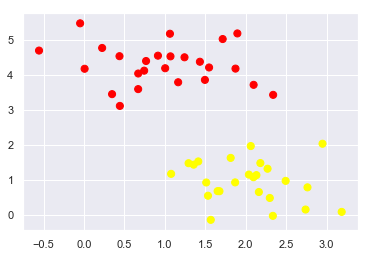

In [12]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")


(-1, 3.5)

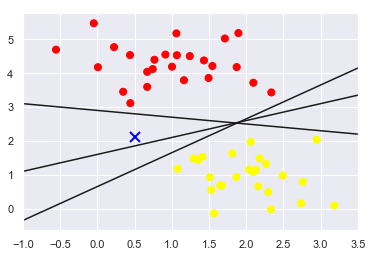

In [14]:
xx=np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt.plot([0.5],[2.1],'x',color="blue",markeredgewidth=2,markersize=10)
for a,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    yy=a*xx+b
    plt.plot(xx,yy,'-k')
plt.xlim(-1,3.5)



## Maximizacion del margen 

(-1, 3.5)

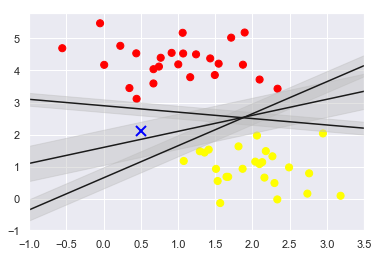

In [16]:
xx=np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt.plot([0.5],[2.1],'x',color="blue",markeredgewidth=2,markersize=10)
for a,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yy=a*xx+b
    plt.plot(xx,yy,'-k')
    plt.fill_between(xx,yy-d,yy+d,edgecolor="none",color="#BBBBBB",alpha=0.4)
plt.xlim(-1,3.5)

## Creacion del modelo SVM

In [18]:
from sklearn.svm import SVC

In [21]:
model=SVC(kernel="linear",C=1E10)
model.fit(X,Y)


SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
    print(model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "black");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    